# Downoading data from Kaggle directly

In [0]:
!pip install -q kaggle

In [0]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
! kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          22195  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          16490  
lava18/google-play-store-apps                                Google Play Store Apps                                2MB  2019-02-03 13:55:47          46006  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          18390  
iarunava/cell-images-for-detecting-malaria                

In [0]:
!kaggle datasets download -d rounakbanik/pokemon

  0% 0.00/45.4k [00:00<?, ?B/s]
100% 45.4k/45.4k [00:00<00:00, 18.0MB/s]


In [0]:
!unzip *.zip

Archive:  pokemon.zip
  inflating: pokemon.csv             


In [0]:
!kaggle datasets download -d zynicide/wine-reviews


 63% 32.0M/50.9M [00:00<00:00, 40.3MB/s]
100% 50.9M/50.9M [00:00<00:00, 104MB/s] 
Archive:  pokemon.zip
caution: filename not matched:  wine-reviews.zip


In [0]:
!unzip wine-reviews.zip

Archive:  wine-reviews.zip
  inflating: winemag-data-130k-v2.csv  
  inflating: winemag-data_first150k.csv  
  inflating: winemag-data-130k-v2.json  


In [0]:
import pandas as pd
reviews = pd.read_csv('./winemag-data_first150k.csv', index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


#Univariate  visualization

**Bar Plot** - They map categories to numbers. We can visualize the count of each category. 
So, to inspect a single categorical feature, use barplot.

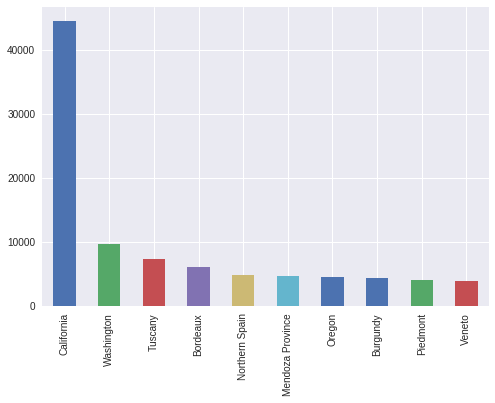

In [0]:
reviews['province'].value_counts().head(10).plot.bar()

The above plot says California is the leading producer os wine. Let's check what percent of total is the californian wine.

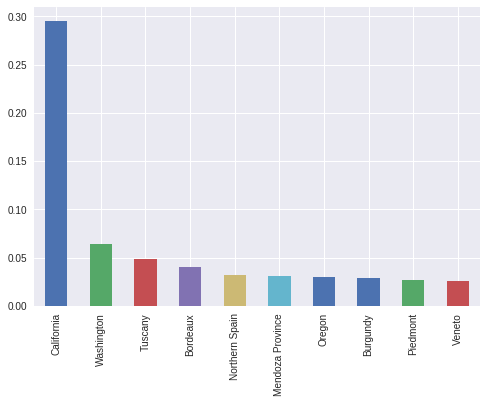

In [0]:
(reviews['province'].value_counts().head(10)/len(reviews)).plot.bar()

Nearly 30% is californian make.

**Line Charts** - In the above example, province is limited to very few categories. What if there huge number of unique values? Making a barplot in that case won't be helpful. Line chart can pass over any number of many individual values, maing it the first choiceof tool for analyzing ditribution of many set of unique categories.

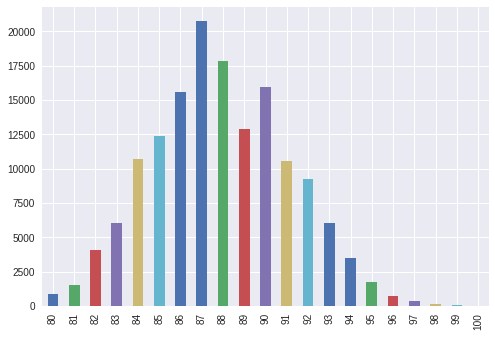

In [0]:
reviews['points'].value_counts().sort_index().plot.bar()

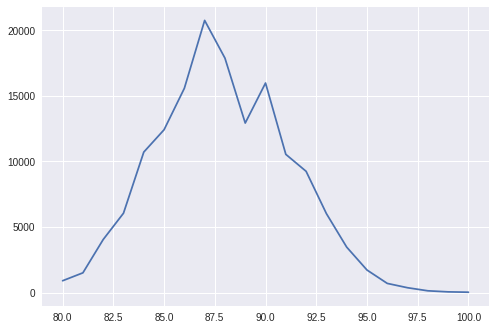

In [0]:
reviews['points'].value_counts().sort_index().plot.line()

Area Chart - Same as line chart but the area is shaded. When plotting one single feature, line or area plot can be used interchangeably.

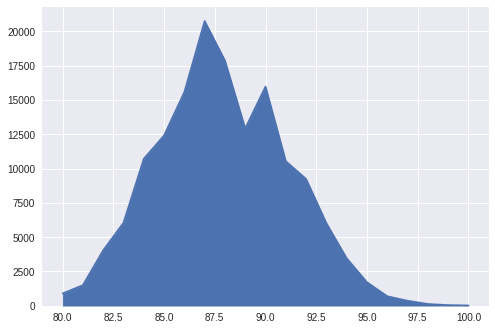

In [0]:
reviews['points'].value_counts().sort_index().plot.area()

**Interval data** - What if the single feature has infinitely large number of categories? Say temperature at Chennai day to day. We cannot use barplot in that case. Line charts work better. But histograms  look even better.

**Histogram** - Splits the entire data into equal intervals and plots bar in each interval. Basically a barchart. But take care of outliers when plotting histogram, as it would take outliers into account while splitting the intervals.

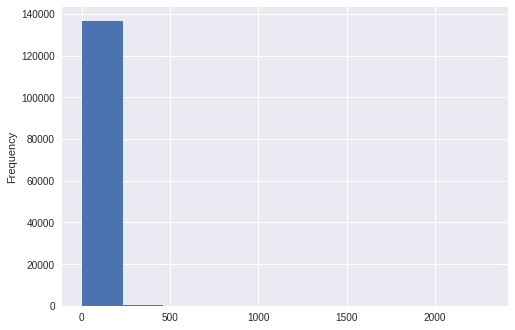

In [0]:
reviews['price'].plot.hist()

In [0]:
reviews[reviews['price'] > 1500]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


It's always better to limit the range when using histogram

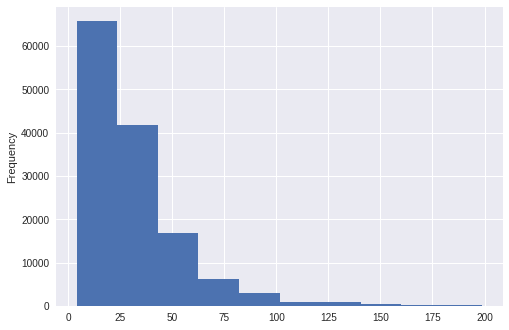

In [0]:
reviews[reviews['price']<200]['price'].plot.hist()

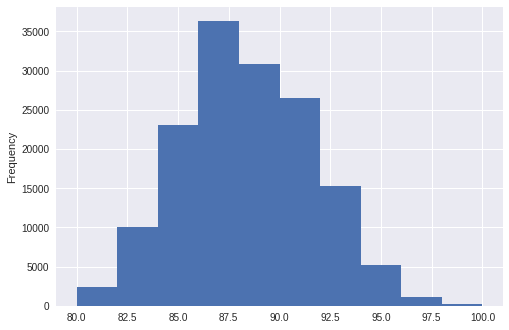

In [0]:
reviews['points'].plot.hist()

**Pie Chart**

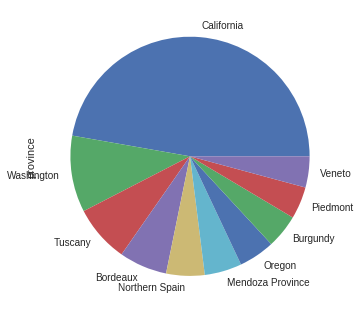

In [0]:
reviews['province'].value_counts().head(10).plot.pie()

import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

If there are too many categories, avoid pie chart as the area looks ambiguous.

# Bivariate Plotting

So far, we saw how to analyze a single variable using univariate plotting. At times, we've to plot two variables to check the relation between one another. 

Scatter plot - The simplest way to find the relation between two variables is by plotting scatter plot. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


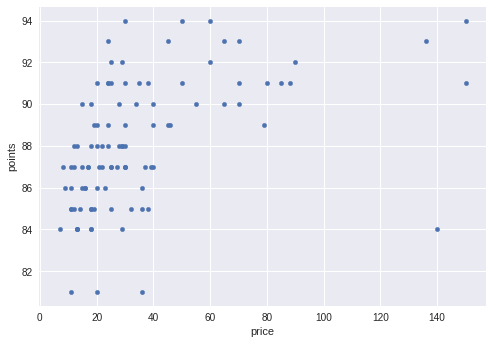

In [0]:
reviews[reviews['price']<200].sample(100).plot.scatter(x='price', y='points')

One problem with scatter plot is that, if the dataset is huge, multiple points overlap and make the plot look unclear. PFB.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


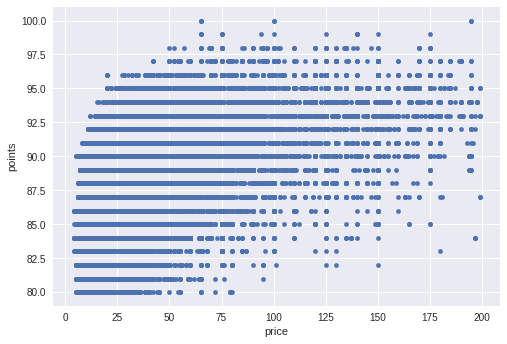

In [0]:
reviews[reviews['price']<200].plot.scatter(x='price', y='points')

One way to overcome this is by downsampling, as we did earlier. But downsampling sometimes lead to lose meaningful insights from data. So use scatterplot only for small datasets. 

**Hexplot  ** 

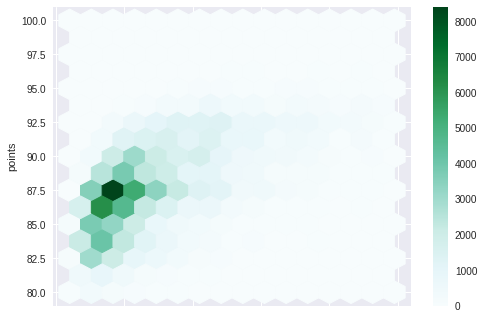

In [0]:
reviews[reviews['price']<100].plot.hexbin(x='price', y='points', gridsize=15)

In [0]:
!kaggle datasets download -d residentmario/most-common-wine-scores


  0% 0.00/68.2k [00:00<?, ?B/s]
100% 68.2k/68.2k [00:00<00:00, 25.9MB/s]


In [0]:
!unzip most-common-wine-scores.zip

Archive:  most-common-wine-scores.zip
  inflating: top-five-wine-score-counts.csv  
  inflating: top-five-wine-scores.csv  


Stacked Plot - If there many categories to compare, we would use stacked plot/side by side plot to compare

In [0]:
wine_counts = pd.read_csv('./top-five-wine-score-counts.csv', index_col=0)
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


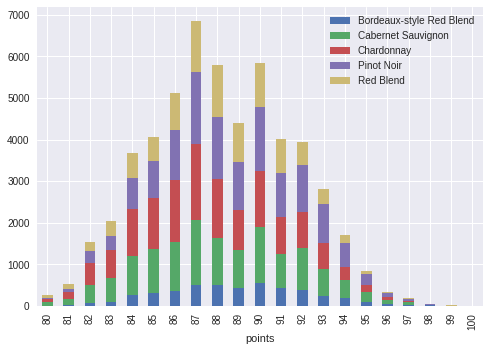

In [0]:
wine_counts.plot.bar(stacked=True)

Bivariate line chart - Interpretability is hard from stacked bar chart. Let's try stacked line plot.

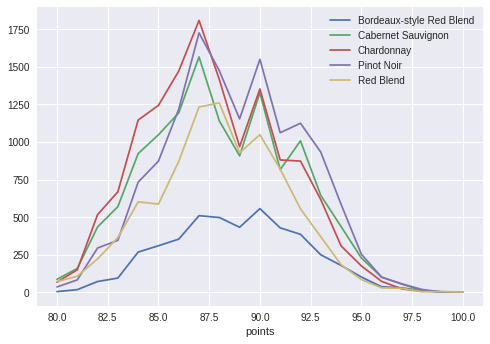

In [0]:
wine_counts.plot.line()

Interpretability is good above. 'Pinot Noir' scores 90.0 many times than any other brands.

Stacked area plot - 

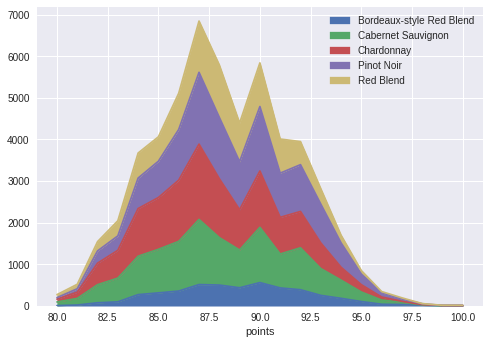

In [0]:
wine_counts.plot.area()

# Visualization using seaborn

Things we did using pandas can be replicated using seaborn. 

countplot - Similar to bar chart, but it does aggregation for us. No explicit aggregation(value_counts()) have to be done unlike pd.plot.bar().

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


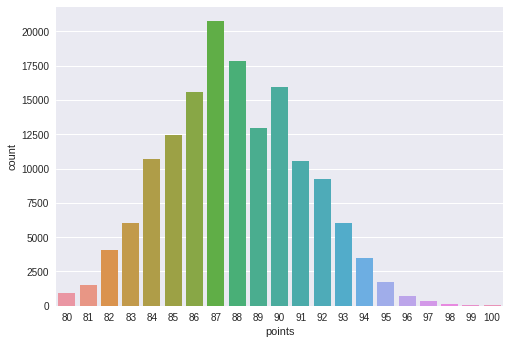

In [0]:
sns.countplot(reviews['points'])

**kdeplot** - 

Kernel density estimate is a statistical technique to smooth out data noise. It addresses an important weakness in line chart that it buff out 'outliers' and 'in-betweeners' that causes line chart to dip suddenly.

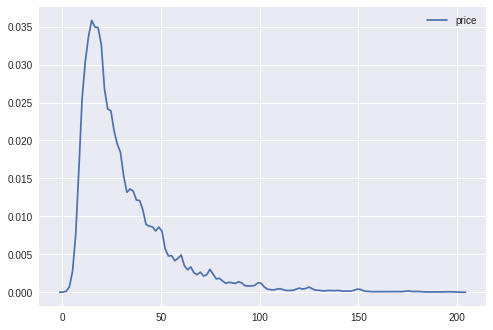

In [0]:
sns.kdeplot(reviews.query('price<200').price)

X-axis represents the price value and Y-axis represents the frequency of each price. We don't even need to aggregate price.

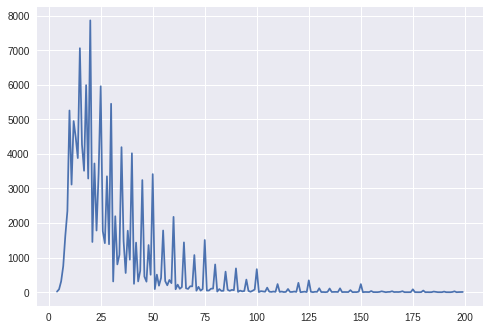

In [0]:
reviews[reviews['price']<200]['price'].value_counts().sort_index().plot.line()

One disadvantage of kdeplot is that if tere are no values in between two prices, it approximates the value to make the distribution smooth, which is not accurate.

**Distplot** - 

Seaborn equivalent of histogram in pandas. 


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


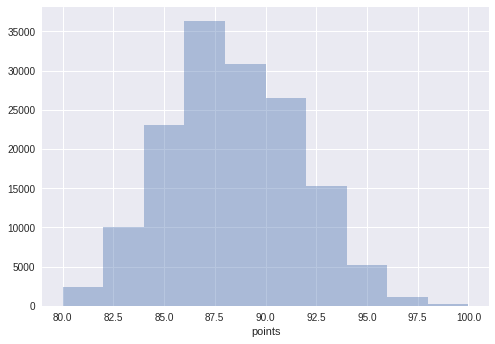

In [0]:
sns.distplot(reviews['points'], bins=10, kde=False)

If kde is not set False, a density plot(kde) will be drawn.

To plot two variables against one another in seaborn, we use jointplot. Let's plot scatter and hex plot in sns.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


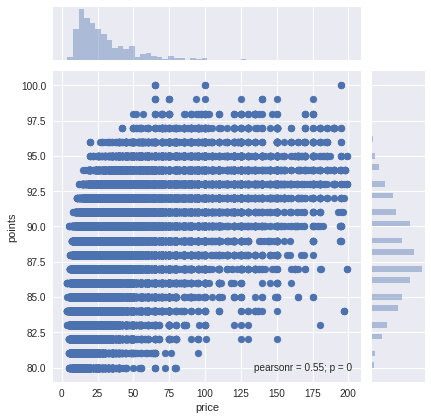

In [0]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price']<200])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


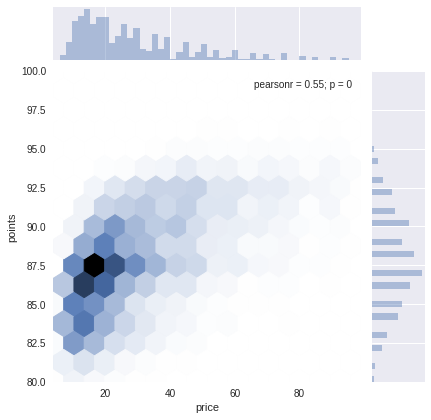

In [0]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price']<100], kind='hex', gridsize=15)

Box plot - 

A very useful statistical tool to study distribution of interval data. Not useful for categorical data. Helps to visualize 5 point summary in the data.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


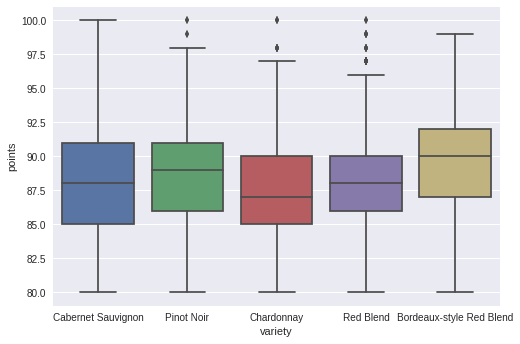

In [0]:
df = reviews[reviews.variety.isin(reviews['variety'].value_counts().head(5).index)]

sns.boxplot(x='variety', y='points', data=df)

Violin Plot - 

Can be used in place of boxplot and uses kde.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


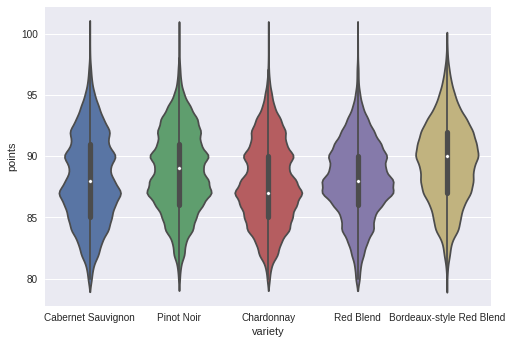

In [0]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

# Faceting with seaborn

Faceting is breaking up the visualization into divisions. FacetGrid is an object that stores useful information on how do we want to break up the data for visualization.

Facting brings in multi-variate in the sense, we break down data into some dimension, before even plotting the data.

Suppose that we want to break the visualization into two plots that shows points distribution only for varieties 'Pinot Noir' and 'Red Blend'.

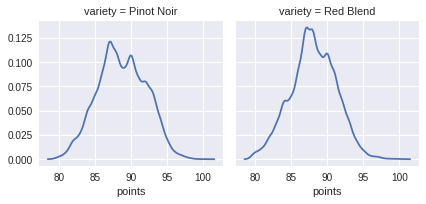

In [0]:
df = reviews[reviews['variety'].isin(['Pinot Noir', 'Red Blend'])]
g = sns.FacetGrid(df, col='variety')
g.map(sns.kdeplot, 'points')

We can even break the visualization row and column wise

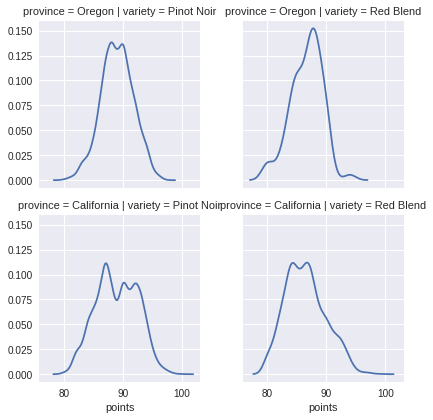

In [0]:
df = reviews[reviews['variety'].isin(['Pinot Noir', 'Red Blend'])]
df = df[df['province'].isin(['California','Oregon'])]
g = sns.FacetGrid(df, row='province', col='variety')
g.map(sns.kdeplot, 'points')

Pair plot - 

When starting out EDA, first thing data scienists try is to find out how variables are correlated? Let's see how it works.

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


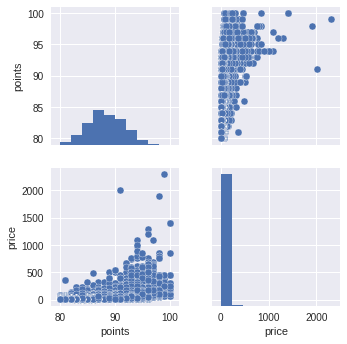

In [0]:
sns.pairplot(reviews[['points','price','country']])